In [3]:
#This a Covid 19 data analysis exemple and challenge.
#@Martin Mbalkam
#we will use Pandas, numpy, Matplotlib and seaborn library
#We scrap data directly online on the WHO website
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
#import data and create a pandas dataframe
df=pd.read_csv('C:\data\WHO-COVID-19-global-data.csv')
#df=pd.read_csv('https://srhdpeuwpubsa.blob.core.windows.net/whdh/COVID/WHO-COVID-19-global-data.csv')

In [4]:
#we first explore data
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [6]:
#data description
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,3.902800e+04,5.784000e+04,25001.000000,5.784000e+04
mean,1.988104e+04,1.792594e+06,282.323947,2.001023e+04
std,2.707823e+05,7.797691e+06,1214.392195,8.186440e+04
min,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,4.300000e+01,4.162750e+03,4.000000,2.800000e+01
50%,3.930000e+02,4.588300e+04,20.000000,5.650000e+02
75%,3.968000e+03,5.220872e+05,105.000000,6.974500e+03
max,4.047548e+07,1.034368e+08,47687.000000,1.194158e+06


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      57840 non-null  object 
 1   Country_code       57599 non-null  object 
 2   Country            57840 non-null  object 
 3   WHO_region         53502 non-null  object 
 4   New_cases          39028 non-null  float64
 5   Cumulative_cases   57840 non-null  int64  
 6   New_deaths         25001 non-null  float64
 7   Cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [9]:
df.shape

(57840, 8)

In [10]:
df.describe(include='all')

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,57840,57599,57840,53502,3.902800e+04,5.784000e+04,25001.000000,5.784000e+04
unique,241,239,240,7,NaN,NaN,NaN,NaN
top,2020-01-05,AF,Afghanistan,EURO,NaN,NaN,NaN,NaN
freq,240,241,241,13255,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.988104e+04,1.792594e+06,282.323947,2.001023e+04
std,NaN,NaN,NaN,NaN,2.707823e+05,7.797691e+06,1214.392195,8.186440e+04
min,NaN,NaN,NaN,NaN,-6.507900e+04,0.000000e+00,-3432.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,4.300000e+01,4.162750e+03,4.000000,2.800000e+01
50%,NaN,NaN,NaN,NaN,3.930000e+02,4.588300e+04,20.000000,5.650000e+02
75%,NaN,NaN,NaN,NaN,3.968000e+03,5.220872e+05,105.000000,6.974500e+03


In [11]:
##Initial Notes¶
#The dataset comprises 57 840 rows and 8 columns.
#Just one of those columns (Country_code) contains about 1142 missing datas
#Date data (Date_reported) are stored as object data instead of datetime or numerical data and it contains about 241 unique datas
##Objectives
#I'd be moving forward with the following rows and columns and I'd be answering the following question

#What countries have the highest number of new cases and death
#What countries have the highest number of cumulative cases and deaths
#What WHO_region which also signifies each continent are mostly affected
#Using the vaccination information also to answer likely causes of why the countries have the most deaths

#Converting Date_reported from object to datetime
#Country_code seems to be the same with the country itsef so i am going to drop the country code and converting the
#Date_reported column from object to datetime format to enable me remove the year since that's all i want to deal with
df['Date_reported'] = pd.to_datetime(df['Date_reported'], errors='coerce')
df['year'] = df['Date_reported'].dt.year
df.drop(['Country_code','Date_reported'],axis=1,inplace=True)
df.head(10)

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
0,Afghanistan,EMRO,NaN,0,NaN,0,2020
1,Afghanistan,EMRO,NaN,0,NaN,0,2020
2,Afghanistan,EMRO,NaN,0,NaN,0,2020
3,Afghanistan,EMRO,NaN,0,NaN,0,2020
4,Afghanistan,EMRO,NaN,0,NaN,0,2020
5,Afghanistan,EMRO,NaN,0,NaN,0,2020
6,Afghanistan,EMRO,NaN,0,NaN,0,2020
7,Afghanistan,EMRO,NaN,0,NaN,0,2020
8,Afghanistan,EMRO,1.0,1,NaN,0,2020
9,Afghanistan,EMRO,NaN,1,NaN,0,2020


In [12]:
#Then we start the data analysis
#W display the countries with the highest fatalities.
#We will identify the nations in our study that do the best the best job of preventing the epidemic from spreading.

#Countries with most cumulative covid 19 cases
#From the nation with the most COVID-19 cases to the nation with the fewest, the countries are ranked here.

covid_cumul_cases = pd.DataFrame(df.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)

covid_cumul_cases.head()

,Cumulative_cases
Country,
United States of America,15322737462
China,8725930796
India,7523575724
Brazil,5823160769
France,5111976234


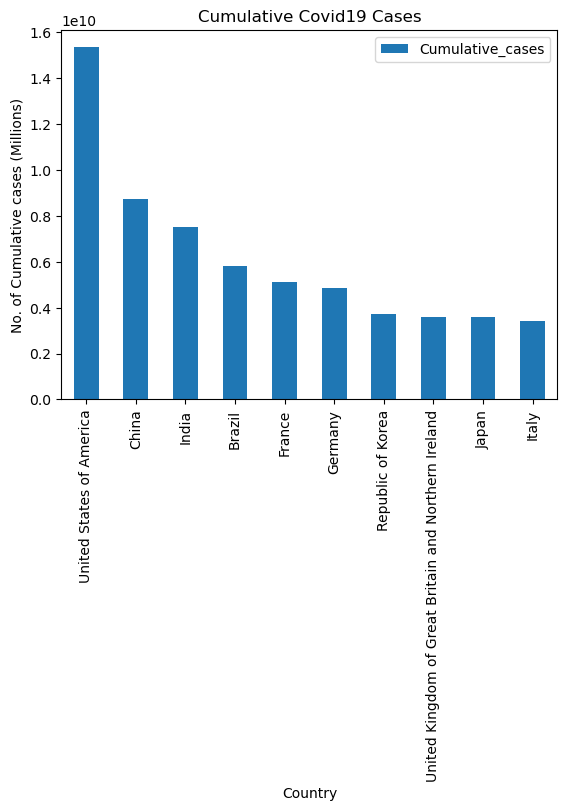

In [18]:
covid_cumul_cases.head(10).plot(kind='bar',  xlabel = 'Country', 
                                ylabel = 'No. of Cumulative cases (Millions)',
                                title = 'Cumulative Covid19 Cases')
plt.show()

In [13]:
#Countries with the least covid19 cases
covid_least_cases = pd.DataFrame(df.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',
                                                        ascending=True,axis=0)

covid_least_cases.head(20)

,Cumulative_cases
Country,
Turkmenistan,0
Democratic People's Republic of Korea,0
International conveyance (Kiribati),338
Pitcairn,432
International conveyance (American Samoa),766
International conveyance (Solomon Islands),849
International conveyance (Vanuatu),2064
Tokelau,4778
Holy See,5526


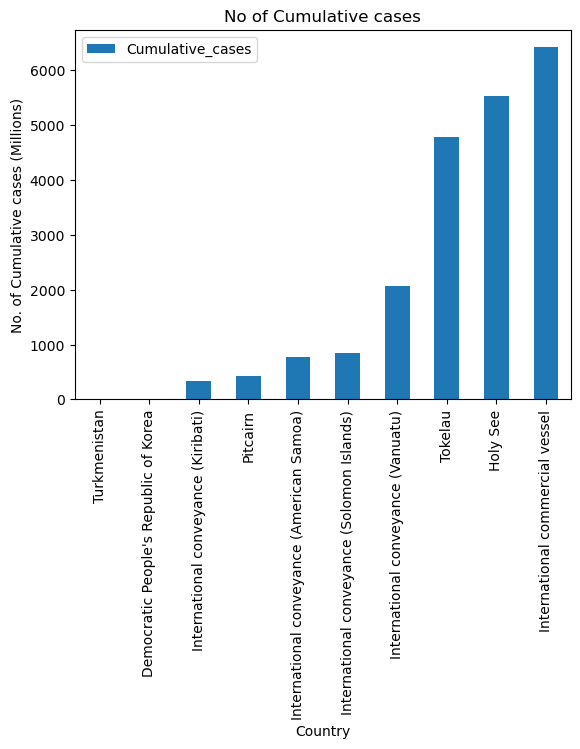

In [23]:
covid_least_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative cases (Millions)',title = 'No of Cumulative cases')
plt.show()

In [14]:
#Covid 19 in different country
covid_new_cases = pd.DataFrame(df.groupby("Country")['New_cases']
                               .agg('sum')).sort_values(by='New_cases',ascending=False,axis=0)

covid_new_cases.head()

,New_cases
Country,
United States of America,103436829.0
China,99375079.0
India,45042054.0
France,38997490.0
Germany,38437756.0


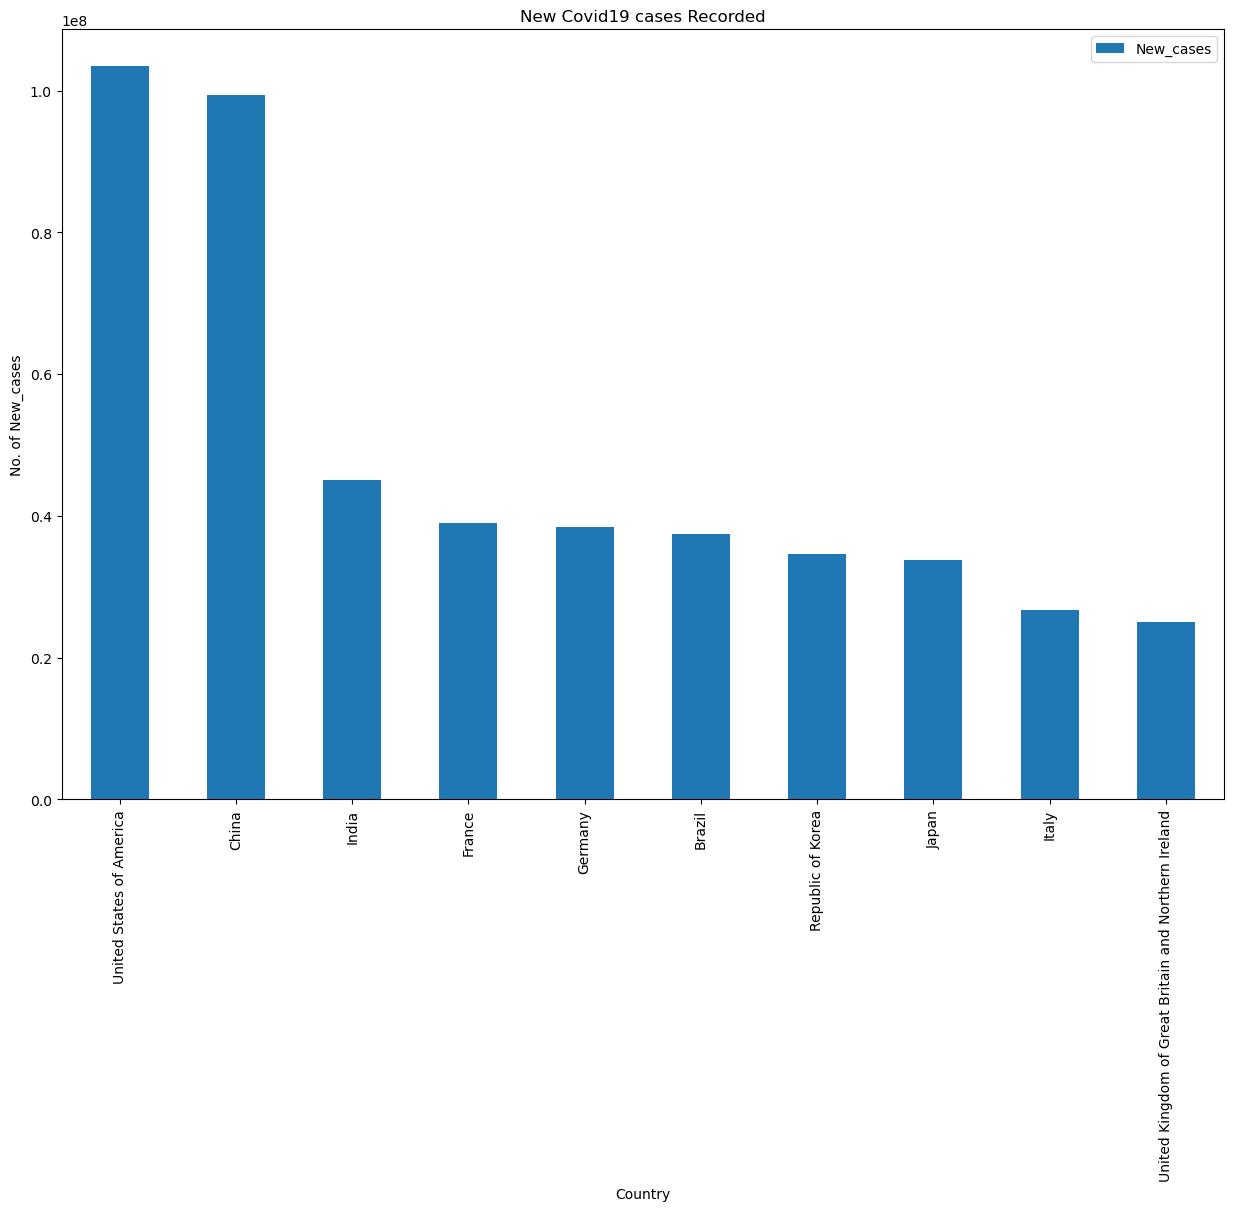

In [15]:
covid_new_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of New_cases',title = 'New Covid19 cases Recorded', figsize=(15,10))
plt.show()

In [16]:
covid_least_new_cases = pd.DataFrame(df.groupby("Country")['New_cases']
                               .agg('sum')).sort_values(by='New_cases',ascending=True,axis=0)

covid_least_new_cases.head(10)

,New_cases
Country,
Turkmenistan,0.0
Democratic People's Republic of Korea,0.0
International conveyance (Kiribati),2.0
International conveyance (American Samoa),4.0
Pitcairn,4.0
International conveyance (Solomon Islands),5.0
International conveyance (Vanuatu),12.0
Holy See,26.0
International commercial vessel,29.0


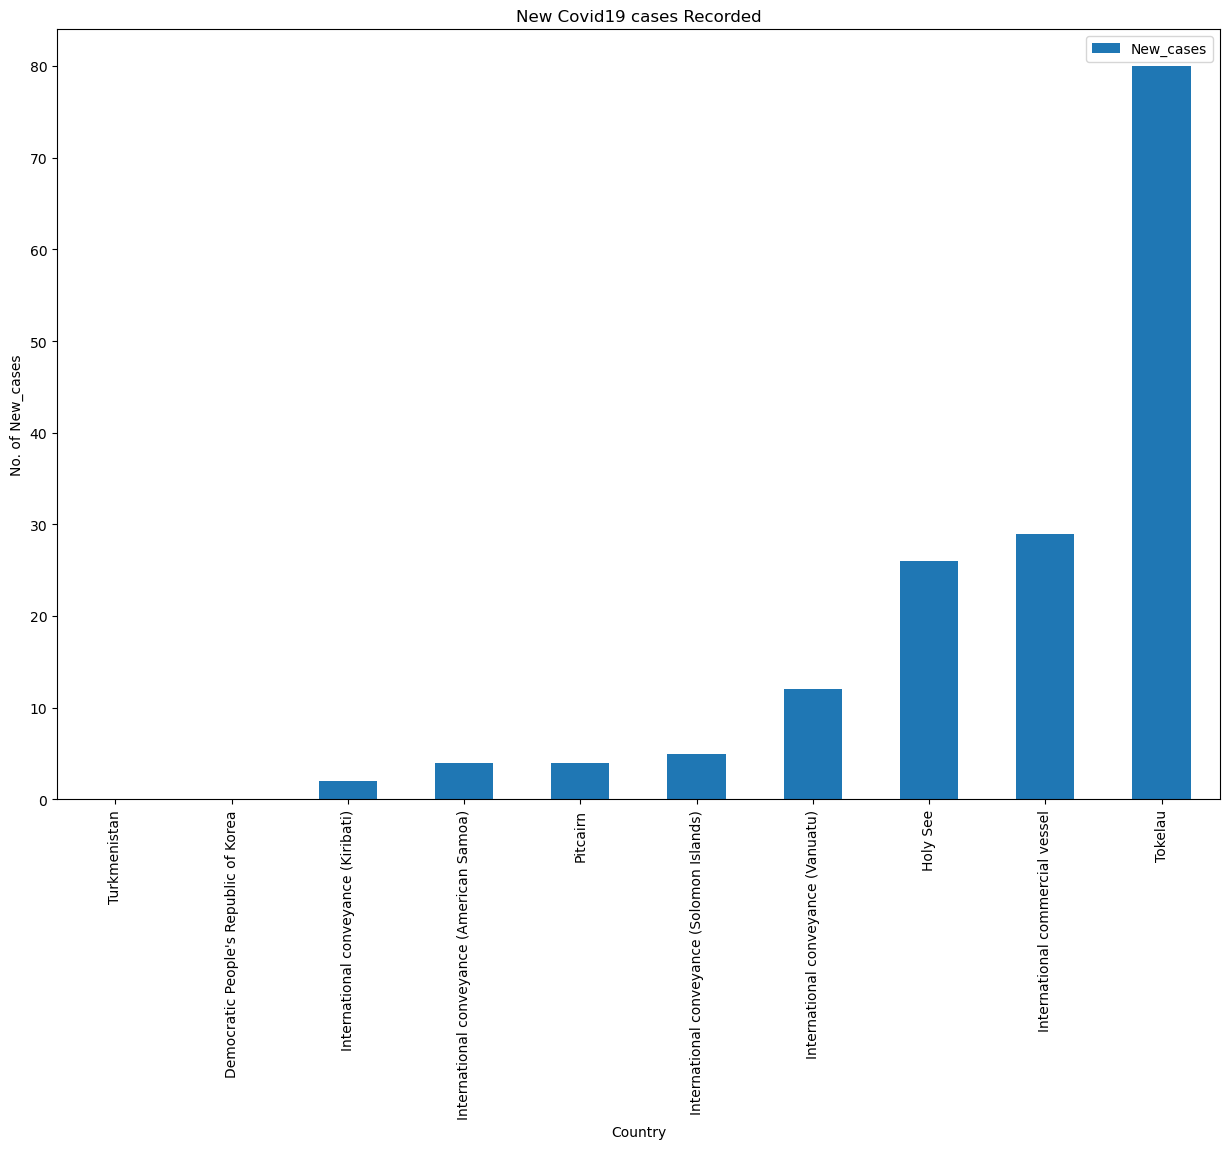

In [27]:
covid_least_new_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of New_cases',title = 'New Covid19 cases Recorded', figsize=(15,10))
plt.show()

In [28]:
#new death by continent
covid_new_death_continent = pd.DataFrame(df.groupby("WHO_region")['New_deaths']
                               .agg('sum')).sort_values(by='New_deaths',ascending=False,axis=0)

covid_new_death_continent.head()

,New_deaths
WHO_region,
AMRO,3023792.0
EURO,2273741.0
SEARO,808810.0
WPRO,421359.0
EMRO,351975.0


In [29]:
#new death by continent
covid_new_death_country = pd.DataFrame(df.groupby("Country")['New_deaths']
                               .agg('sum')).sort_values(by='New_deaths',ascending=False,axis=0)

covid_new_death_country.head()

,New_deaths
Country,
United States of America,1194158.0
Brazil,702116.0
India,533626.0
Russian Federation,403202.0
Mexico,334586.0


In [ ]:
# map with new death

In [17]:
#Covid 19 cumulative case by country, by year
covid_cumul_new_year = pd.DataFrame(df.groupby(["Country",'year'])['Cumulative_cases']
                               .agg('sum')).sort_values(by=['year', 'Cumulative_cases'],ascending=False,axis=0)

covid_cumul_new_year.head(10)

,,Cumulative_cases
Country,year,
United States of America,2024,3309978528
China,2024,3179202367
India,2024,1441108921
France,2024,1247919680
Germany,2024,1230008192
Brazil,2024,1200381472
Republic of Korea,2024,1106299936
Japan,2024,1081714304
Italy,2024,855235549


In [18]:
#Covid 19 cumulative case by country, by for year 2021
year_2021=df[df['year']==2021]
#year_2021.head()
cumulyear_2021=pd.DataFrame(year_2021.groupby(["Country",'year'])['Cumulative_cases']
                               .agg('sum')).sort_values(by=['year', 'Cumulative_cases'],ascending=False,axis=0)
cumulyear_2021.head()

,,Cumulative_cases
Country,year,
United States of America,2021,1857545033
India,2021,1304712915
Brazil,2021,877659930
United Kingdom of Great Britain and Northern Ireland,2021,322540027
Russian Federation,2021,319013022


In [19]:
#cumulative case in all africa country
africa= df[(df['WHO_region'] =='AFRO')&(df['year']==2021)]
#  top ten most affected countries

af_countries = pd.DataFrame(africa.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)


af_countries.head(10)

,Cumulative_cases
Country,
South Africa,112563869
Ethiopia,13982563
Kenya,9676278
Nigeria,9112565
Algeria,8103197
Zambia,7421076
Ghana,5350657
Botswana,5281850
Mozambique,5161618


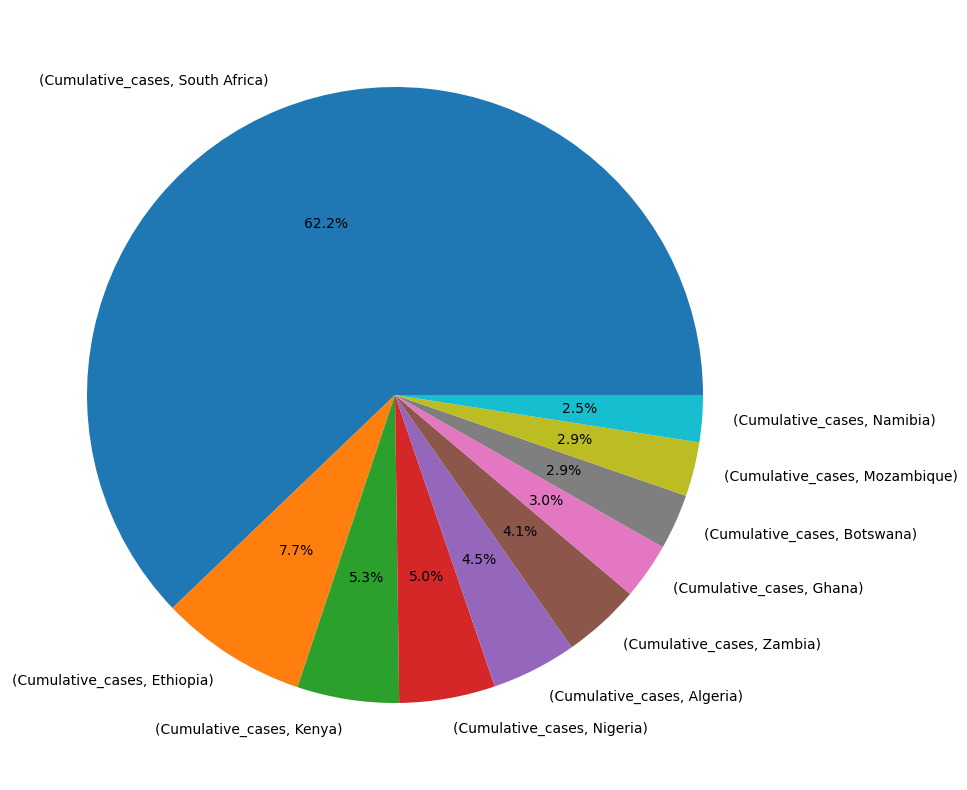

In [27]:
#map or pie chart for africa
af_countries.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(15, 10),
    legend=False,
    )
plt.show()

In [28]:
#cumulative case for america countries
america= df[df['WHO_region'] =='AMRO']
#  top ten most affected countries

am_countries = pd.DataFrame(america.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)

am_countries.head(10)

,Cumulative_cases
Country,
United States of America,15322737462
Brazil,5823160769
Argentina,1563342445
Mexico,1142572064
Colombia,1077555930
Chile,734555555
Peru,693890600
Canada,675445437
Bolivia (Plurinational State of),176671202


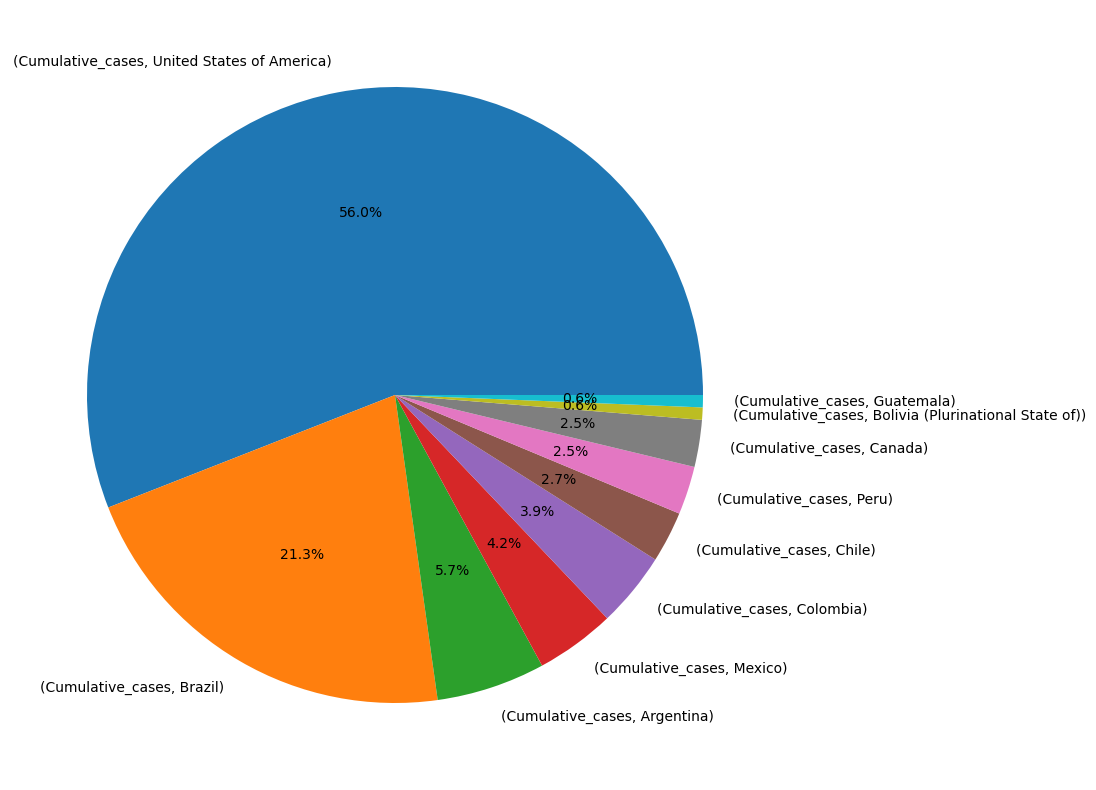

In [29]:
# diplay in chart the top ten countries in maerica with the highest cumulative case
am_countries.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(15, 10),
    legend=False,
    )
plt.show()